<a href="https://colab.research.google.com/github/sirlupinwatson/GG20xOSO/blob/main/Donn%C3%A9es_externes%C2%A0_fichiers_locaux%2C_Drive%2C_Sheets_et_Cloud%C2%A0Storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

df = pd.read_csv('GG20xOSO_GitHub_Metrics.csv')
print(df.head())

   Unnamed: 0  chain_id  round_id  \
0           0        10         9   
1           1     42161        26   
2           2        10         9   
3           3     42161        25   
4           4     42161        28   

                                       round_name  \
0  Token Engineering QF Grants Round: Spring 2024   
1                             Web3 Infrastructure   
2  Token Engineering QF Grants Round: Spring 2024   
3                                   dApps & Apps    
4                      Hypercerts Ecosystem Round   

                        project_name_x  project_github  \
0  Bonding Curve Research Group (BCRG)  bonding-curves   
1  Bonding Curve Research Group (BCRG)  bonding-curves   
2                             Armitage   armitage-labs   
3                             Armitage   armitage-labs   
4                             Armitage   armitage-labs   

                               payout_address    status  \
0  0x29567BdBcC92aCF37AC6B56B69180857bB69f7D1  APP

In [12]:
# Non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns


df_numeric = df.drop(non_numeric_cols, axis=1)

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [13]:
from sklearn.cluster import KMeans

# Number of clusters
k = 3

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster assignments
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


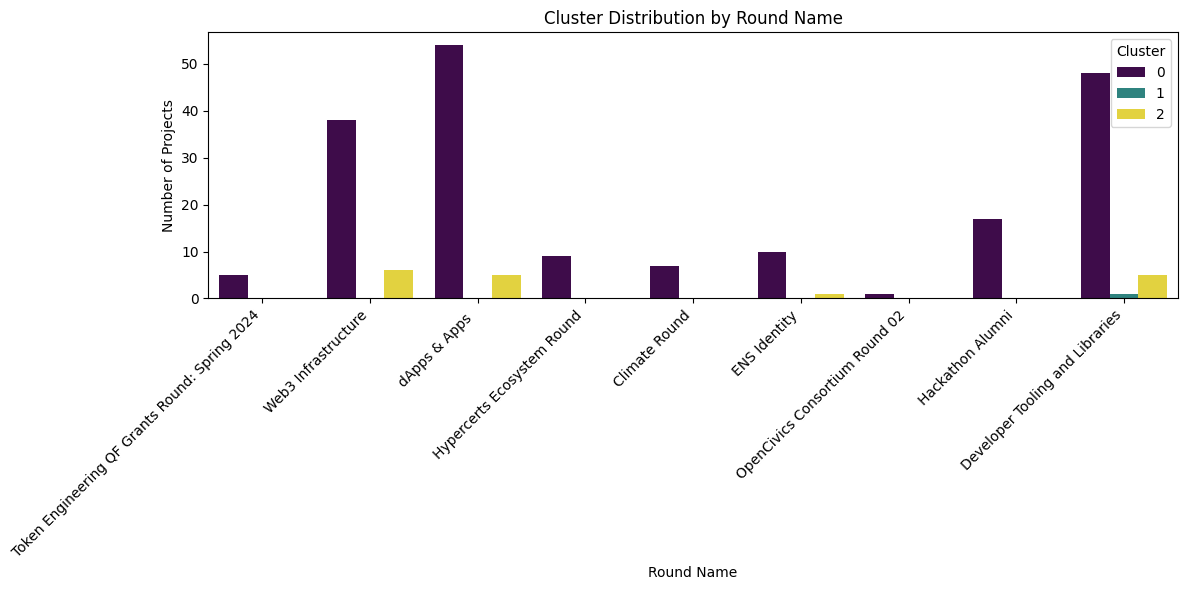

In [16]:
# Cluster distribution by rounds

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # better visualization

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Create a countplot for cluster distribution by round name
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='round_name', hue='cluster', palette='viridis')
plt.title('Cluster Distribution by Round Name')
plt.xlabel('Round Name')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

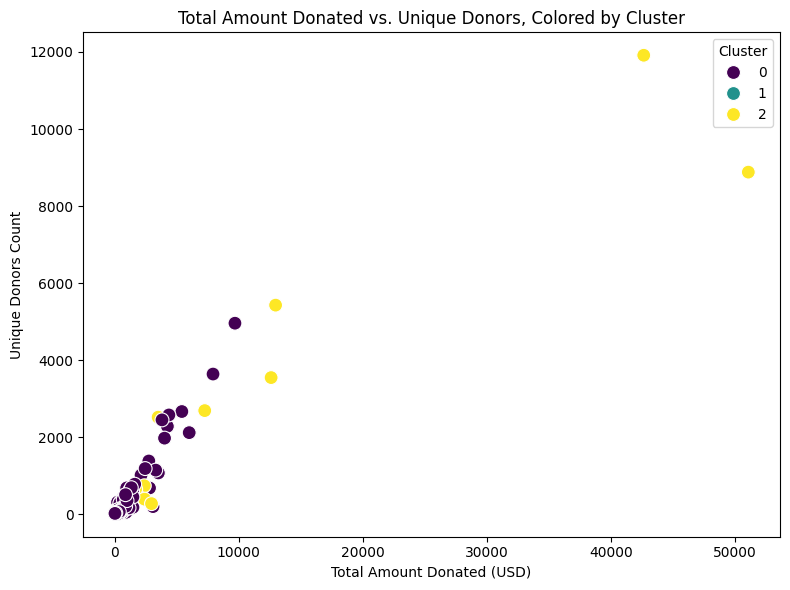

In [17]:
# Scatter Plot of Total Amount Donated vs. Unique Donors, Colored by Cluster

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_amount_donated_in_usd', y='unique_donors_count', hue='cluster', palette='viridis', s=100)
plt.title('Total Amount Donated vs. Unique Donors, Colored by Cluster')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Unique Donors Count')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# Scatterplot to visualize the relationship between total amount donated and unique donors count.


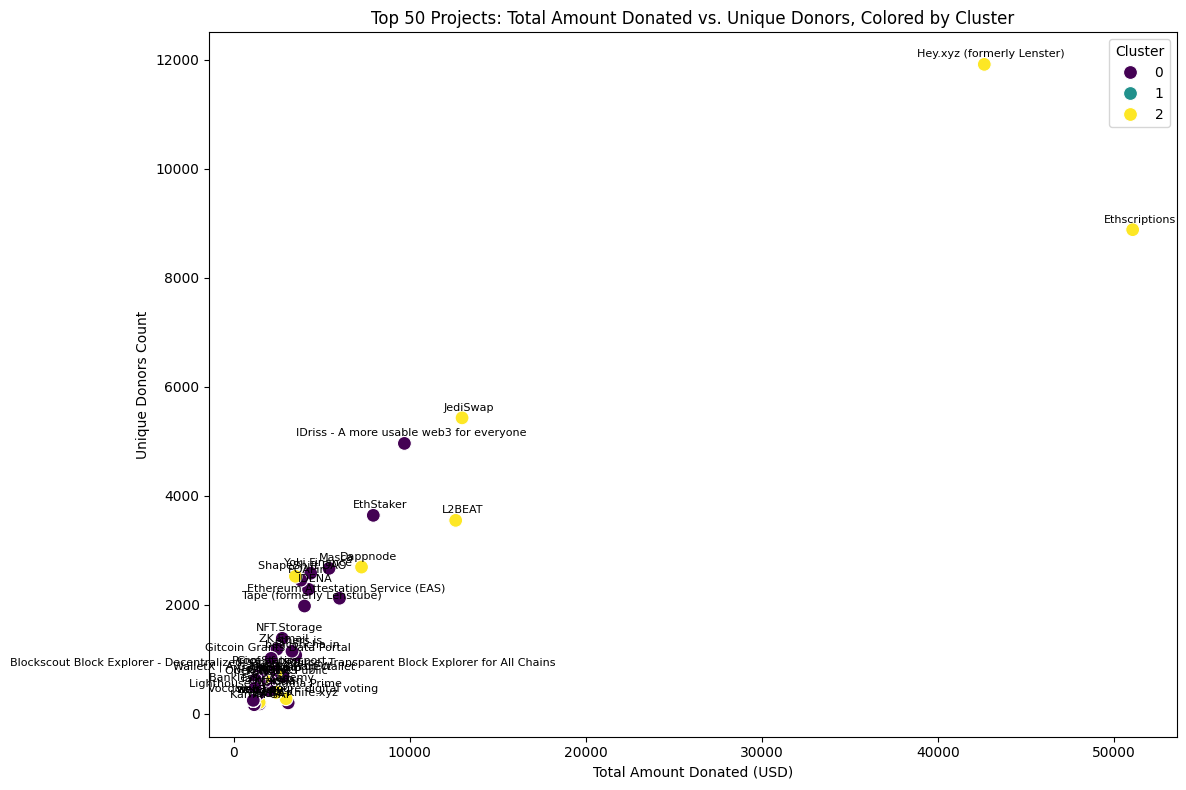

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code for data loading, preprocessing, and clustering)

# Add cluster labels to the original DataFrame
df['cluster'] = cluster_labels

# Select the top 50 projects by total amount donated (adjust as needed)
top_50_projects = df.nlargest(50, 'total_amount_donated_in_usd')

# Create a scatter plot with project names
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_50_projects, x='total_amount_donated_in_usd', y='unique_donors_count',
                hue='cluster', palette='viridis', s=100)
plt.title('Top 50 Projects: Total Amount Donated vs. Unique Donors, Colored by Cluster')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Unique Donors Count')
plt.legend(title='Cluster')

# Annotate each point with the project name
for i, row in top_50_projects.iterrows():
    plt.annotate(row['project_name_x'], (row['total_amount_donated_in_usd'], row['unique_donors_count']),
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("GG20xOSO_GitHub_Metrics.csv")

# Filter for the specified rounds
selected_rounds = ["Token Engineering QF Grants Round: Spring 2024", "Web3 Infrastructure", "dApps & Apps"]
df_filtered = df[df['round_name'].isin(selected_rounds)]

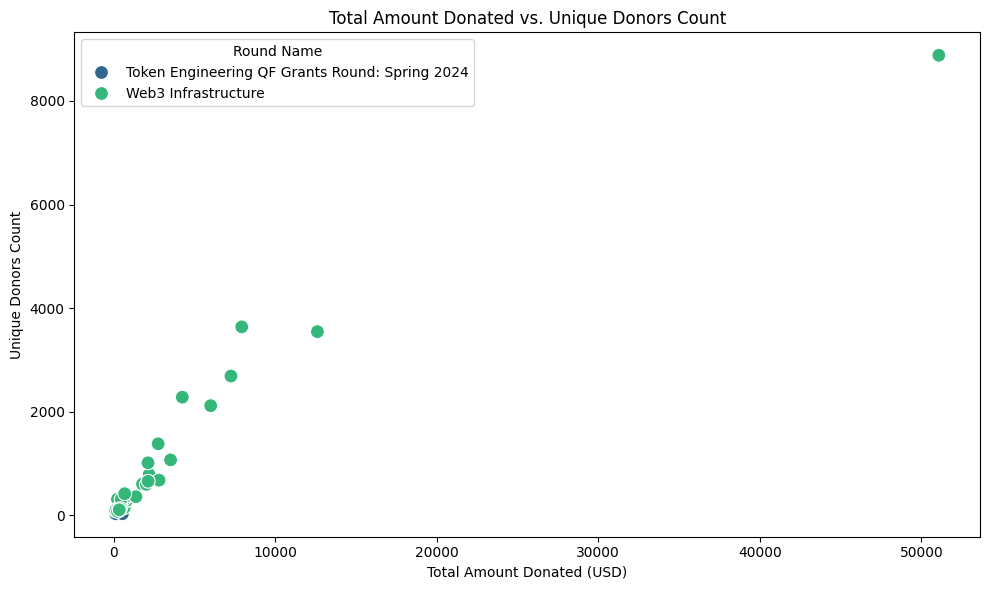

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='total_amount_donated_in_usd', y='unique_donors_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Total Amount Donated vs. Unique Donors Count')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Unique Donors Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

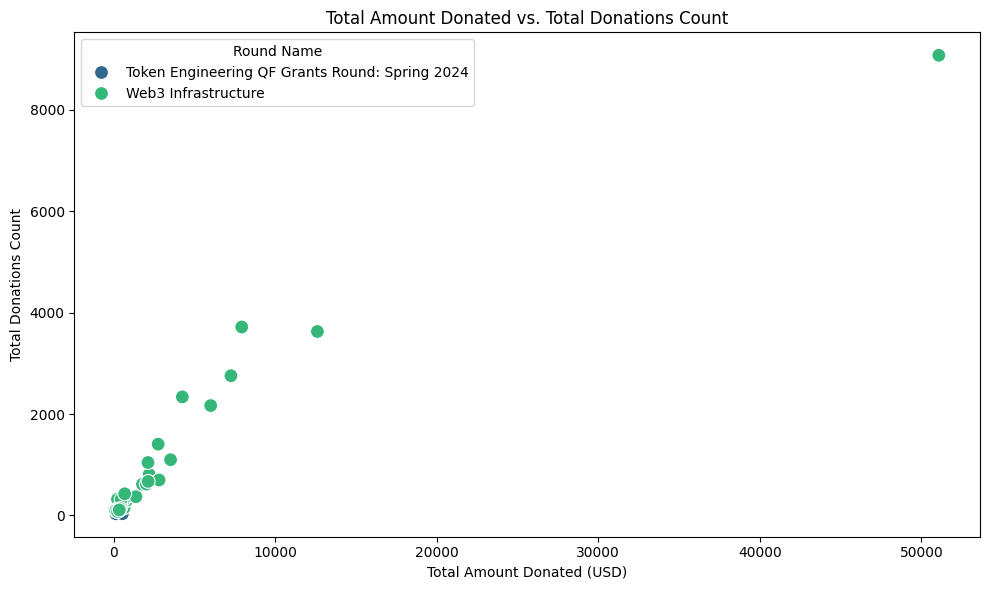

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='total_amount_donated_in_usd', y='total_donations_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Total Amount Donated vs. Total Donations Count')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Total Donations Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

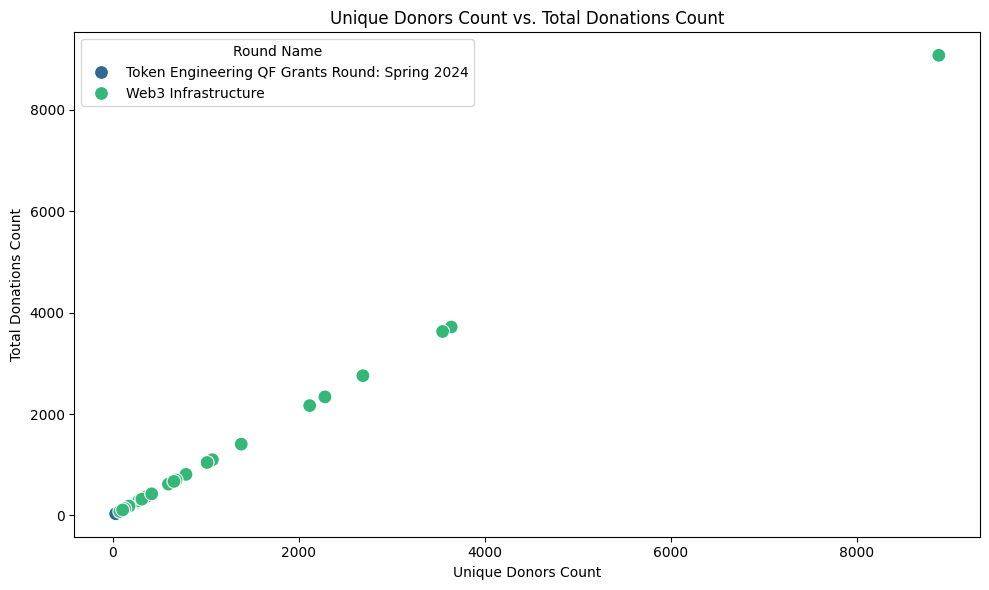

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='unique_donors_count', y='total_donations_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Unique Donors Count vs. Total Donations Count')
plt.xlabel('Unique Donors Count')
plt.ylabel('Total Donations Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

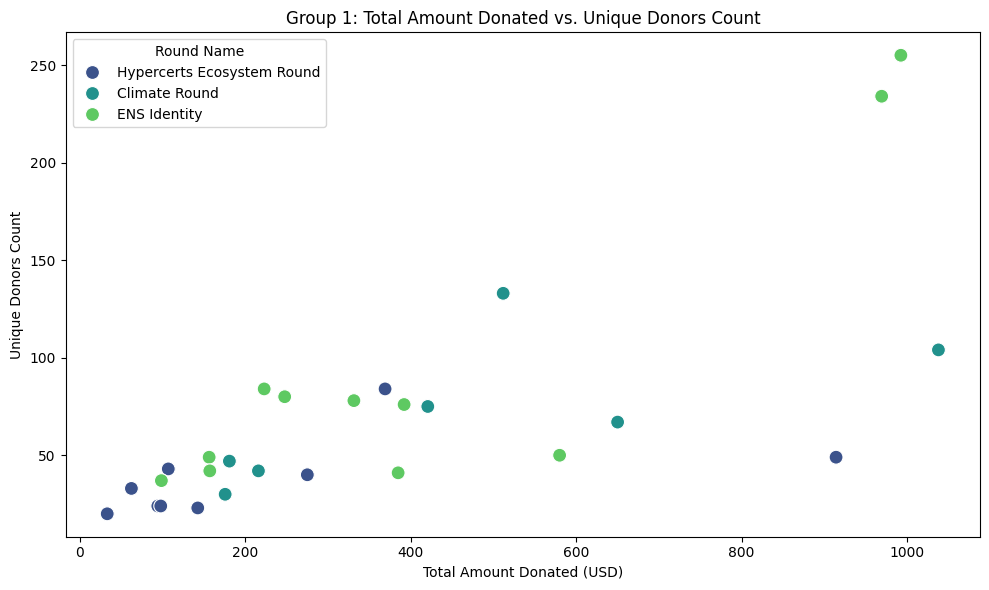

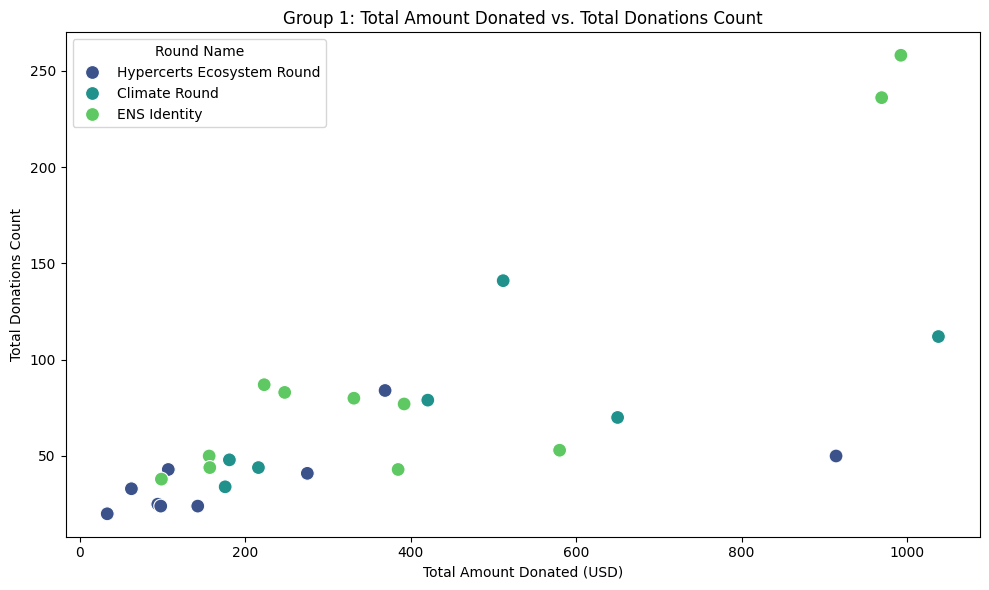

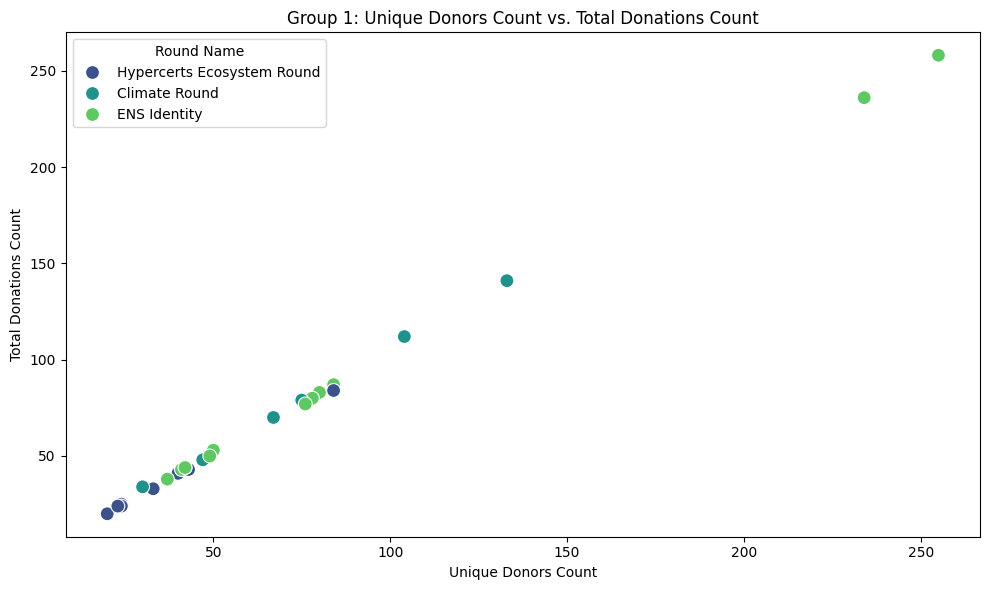

In [23]:
# Filter for the first group of rounds
selected_rounds_1 = ["Climate Round", "Hypercerts Ecosystem Round", "ENS Identity"]
df_filtered_1 = df[df['round_name'].isin(selected_rounds_1)]

# Plot 1: Total Amount Donated vs. Unique Donors Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_1, x='total_amount_donated_in_usd', y='unique_donors_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Group 1: Total Amount Donated vs. Unique Donors Count')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Unique Donors Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

# Plot 2: Total Amount Donated vs. Total Donations Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_1, x='total_amount_donated_in_usd', y='total_donations_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Group 1: Total Amount Donated vs. Total Donations Count')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Total Donations Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

# Plot 3: Unique Donors Count vs. Total Donations Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_1, x='unique_donors_count', y='total_donations_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Group 1: Unique Donors Count vs. Total Donations Count')
plt.xlabel('Unique Donors Count')
plt.ylabel('Total Donations Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

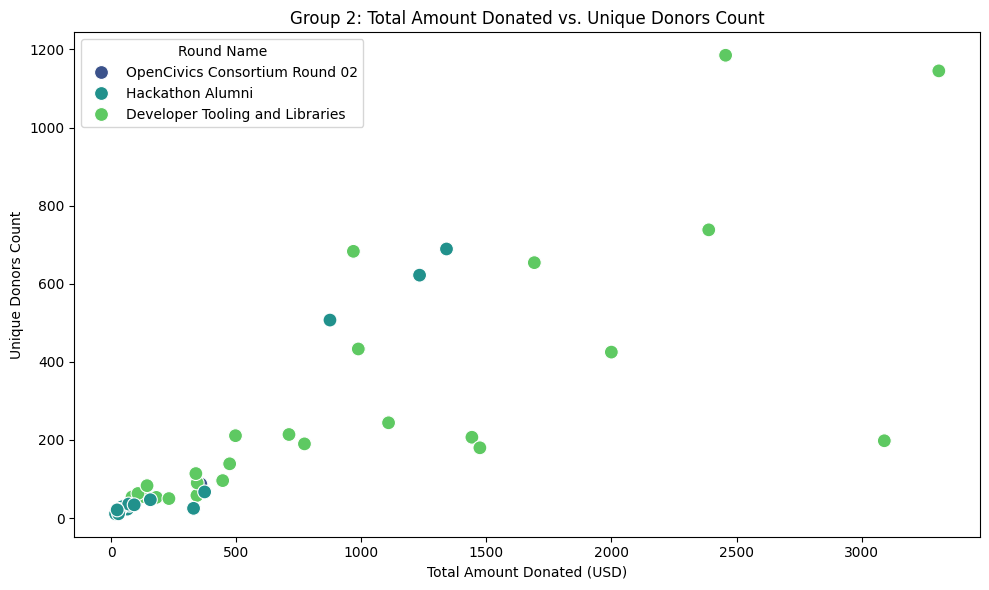

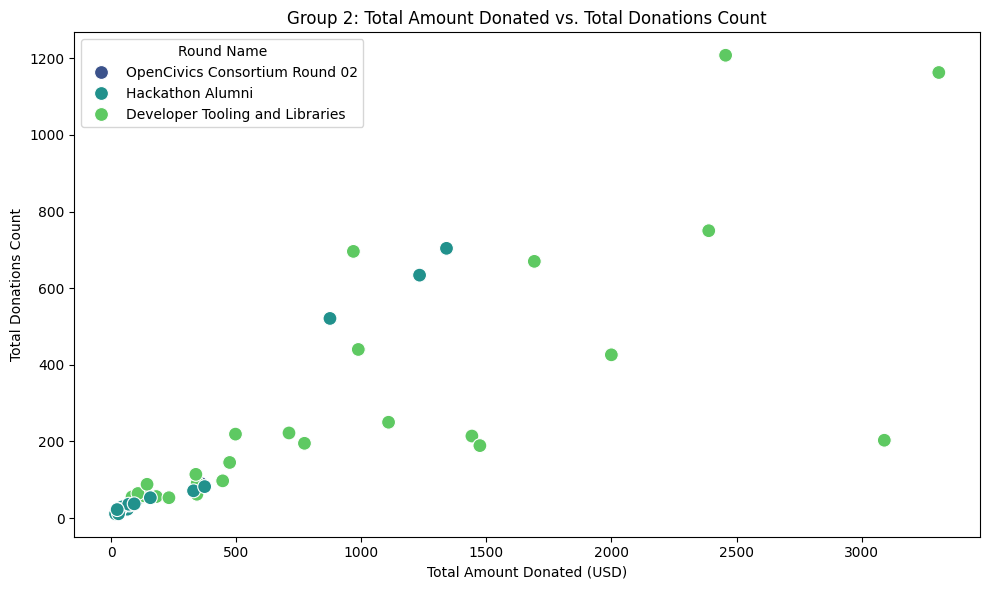

Text(0.5, 0, 'Unique Donors Count')

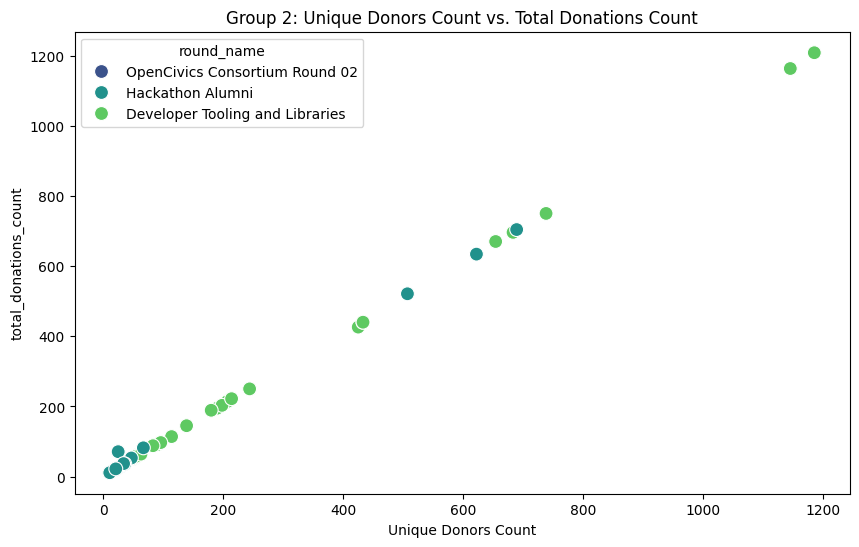

In [24]:
# Filter for the second group of rounds
selected_rounds_2 = ["Hackathon Alumni", "Developer Tooling and Libraries", "OpenCivics Consortium Round 02"]
df_filtered_2 = df[df['round_name'].isin(selected_rounds_2)]

# Plot 1: Total Amount Donated vs. Unique Donors Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_2, x='total_amount_donated_in_usd', y='unique_donors_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Group 2: Total Amount Donated vs. Unique Donors Count')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Unique Donors Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

# Plot 2: Total Amount Donated vs. Total Donations Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_2, x='total_amount_donated_in_usd', y='total_donations_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Group 2: Total Amount Donated vs. Total Donations Count')
plt.xlabel('Total Amount Donated (USD)')
plt.ylabel('Total Donations Count')
plt.legend(title='Round Name')
plt.tight_layout()
plt.show()

# Plot 3: Unique Donors Count vs. Total Donations Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_2, x='unique_donors_count', y='total_donations_count',
                hue='round_name', palette='viridis', s=100)
plt.title('Group 2: Unique Donors Count vs. Total Donations Count')
plt.xlabel('Unique Donors Count')


In [27]:
import pandas as pd

df = pd.read_csv("GG20xOSO_GitHub_Metrics.csv")

# Select the columns of interest (excluding project_name_x)
columns_of_interest = ["total_amount_donated_in_usd", "star_count", "contributor_count",
                       "fork_count", "new_contributor_count_6_months", "commit_count_6_months",
                       "merged_pull_request_count_6_months"]
df_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

print(correlation_matrix)

                                    total_amount_donated_in_usd  star_count  \
total_amount_donated_in_usd                            1.000000    0.012089   
star_count                                             0.012089    1.000000   
contributor_count                                      0.006238    0.961841   
fork_count                                            -0.005961    0.992295   
new_contributor_count_6_months                         0.034519    0.792992   
commit_count_6_months                                  0.086180    0.635967   
merged_pull_request_count_6_months                     0.102833    0.754476   

                                    contributor_count  fork_count  \
total_amount_donated_in_usd                  0.006238   -0.005961   
star_count                                   0.961841    0.992295   
contributor_count                            1.000000    0.951793   
fork_count                                   0.951793    1.000000   
new_contributor_count_

2. Visualizing Correlations with "total_amount_donated_in_usd"

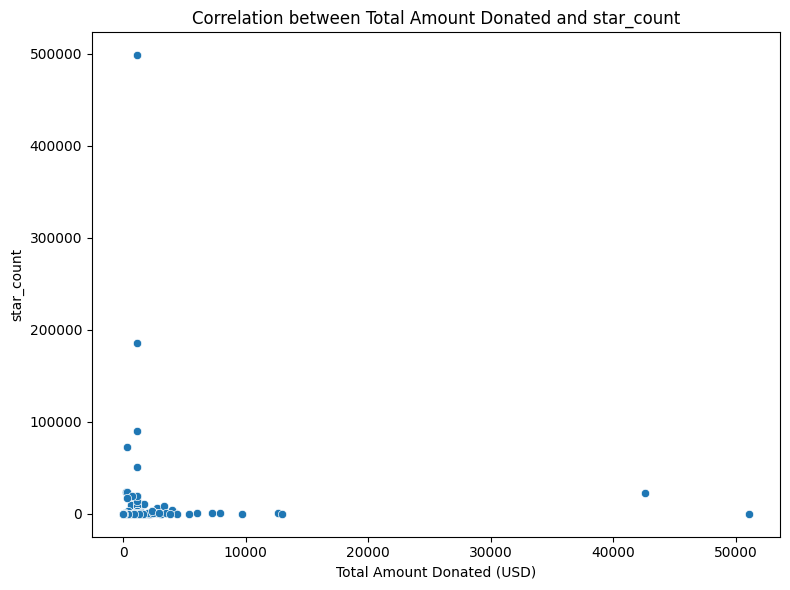

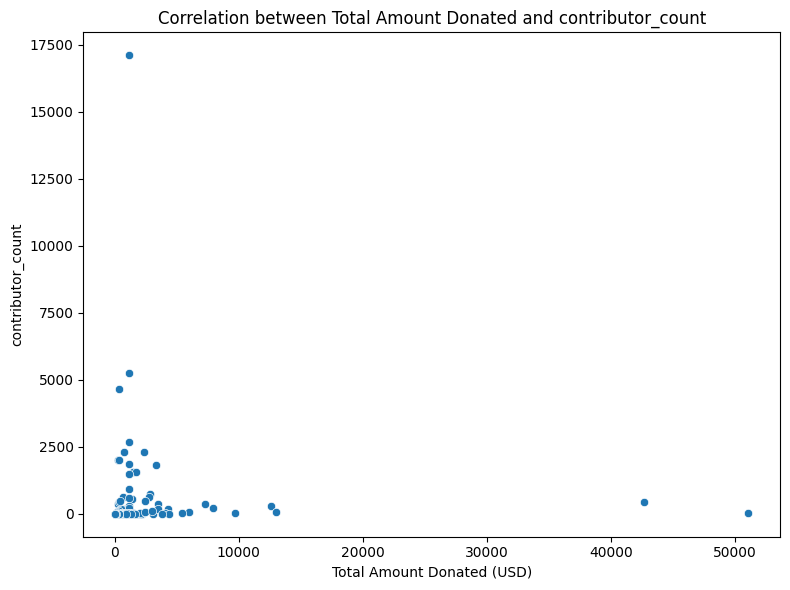

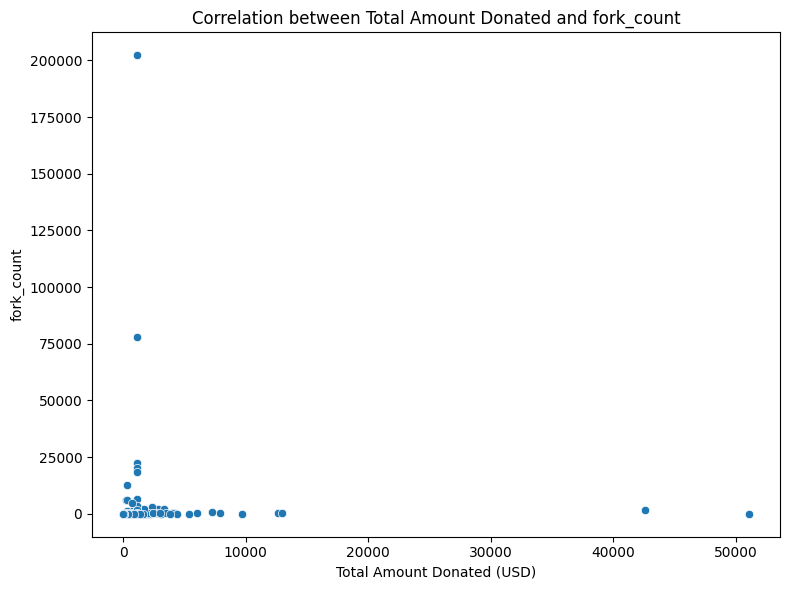

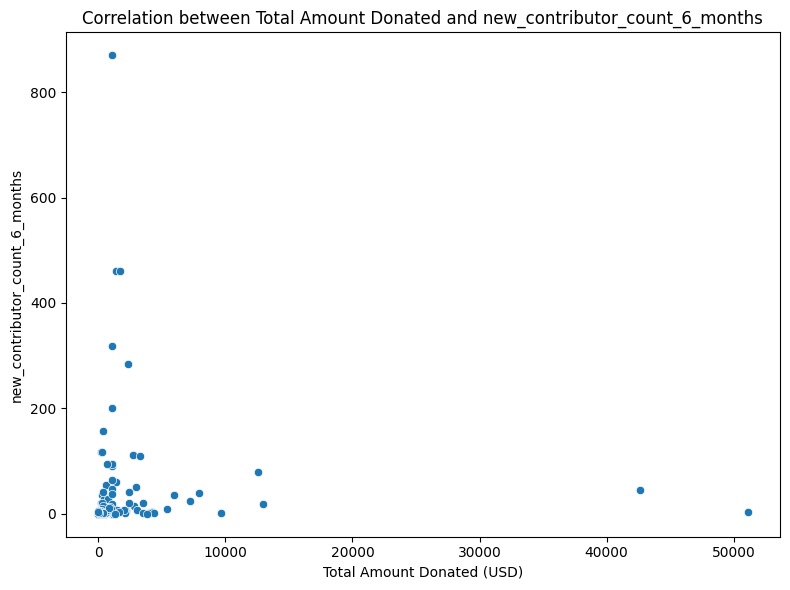

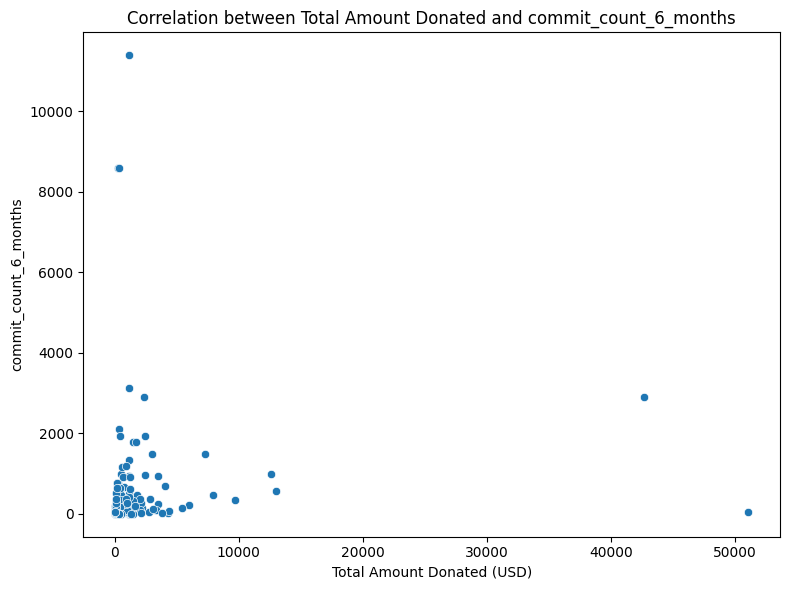

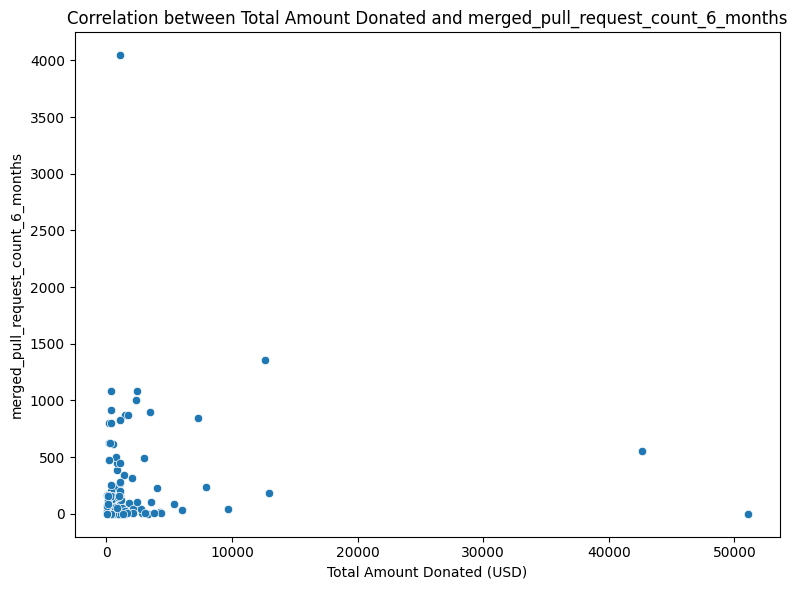

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for each pair of variables
for column in ["star_count", "contributor_count", "fork_count", "new_contributor_count_6_months",
               "commit_count_6_months", "merged_pull_request_count_6_months"]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x="total_amount_donated_in_usd", y=column)
    plt.title(f"Correlation between Total Amount Donated and {column}")
    plt.xlabel("Total Amount Donated (USD)")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

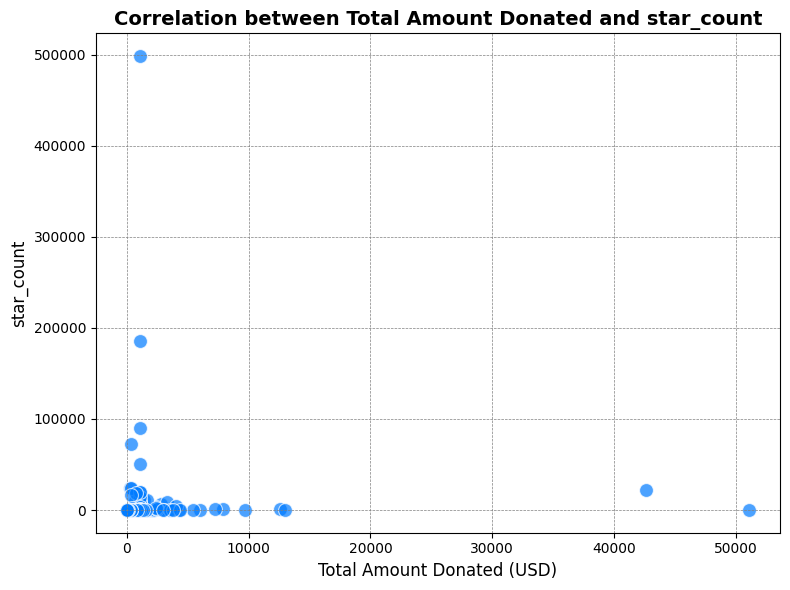

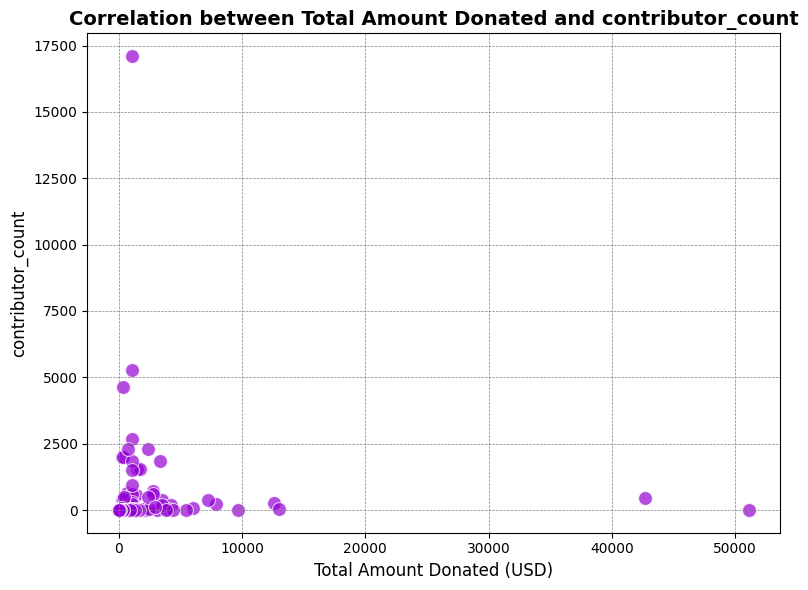

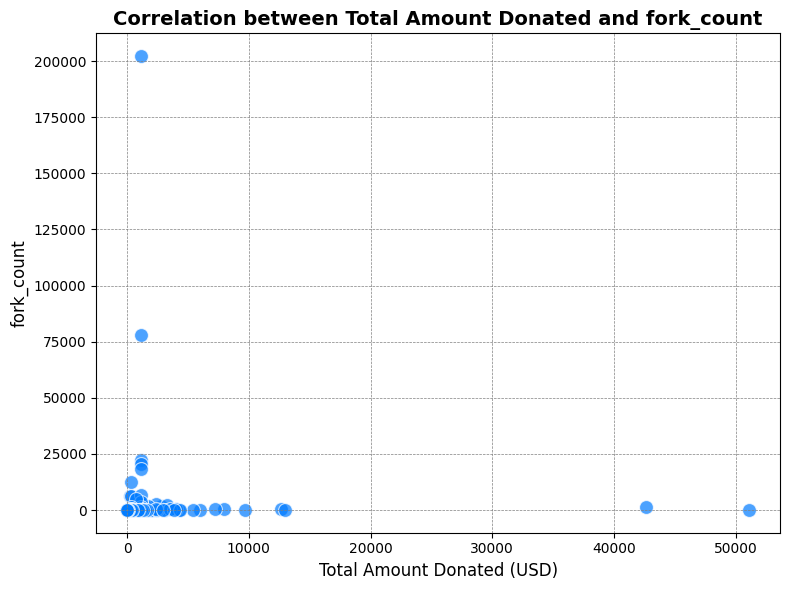

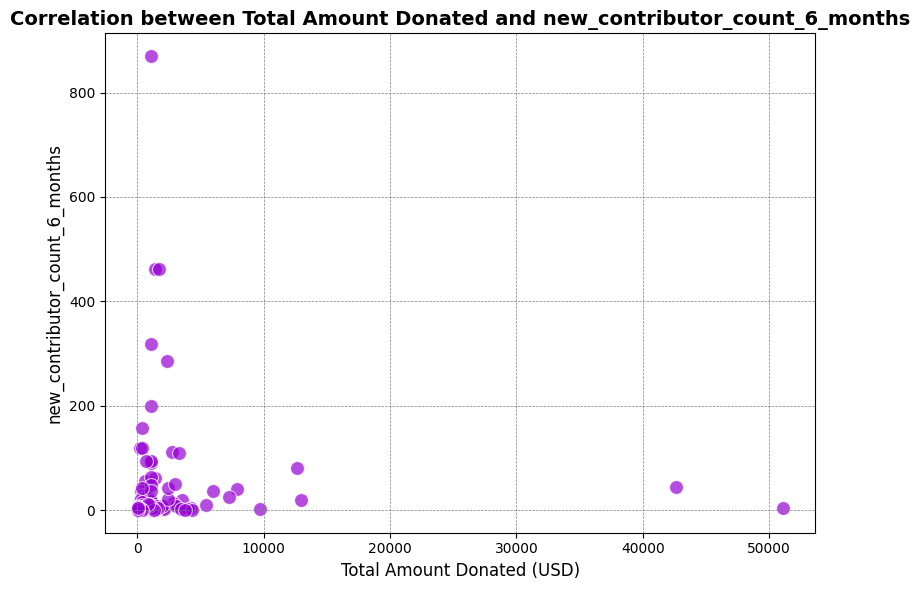

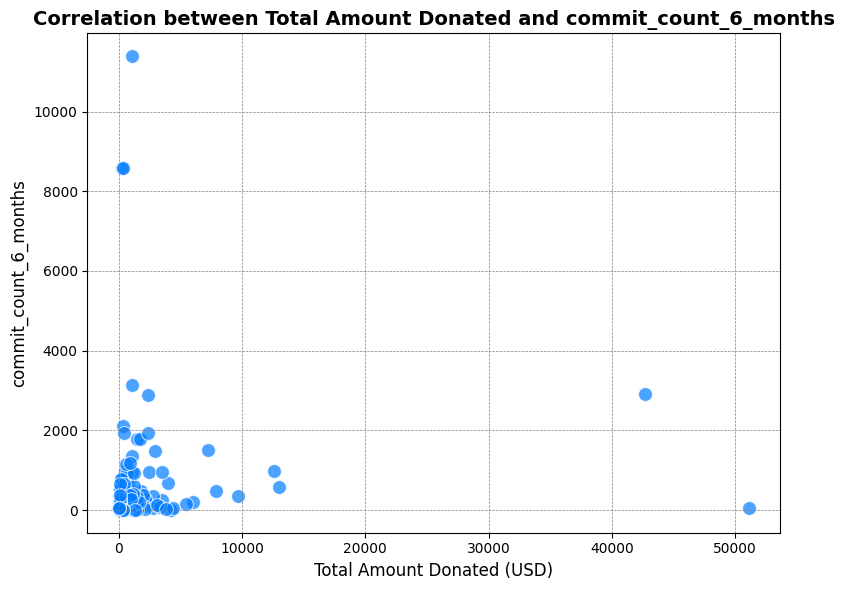

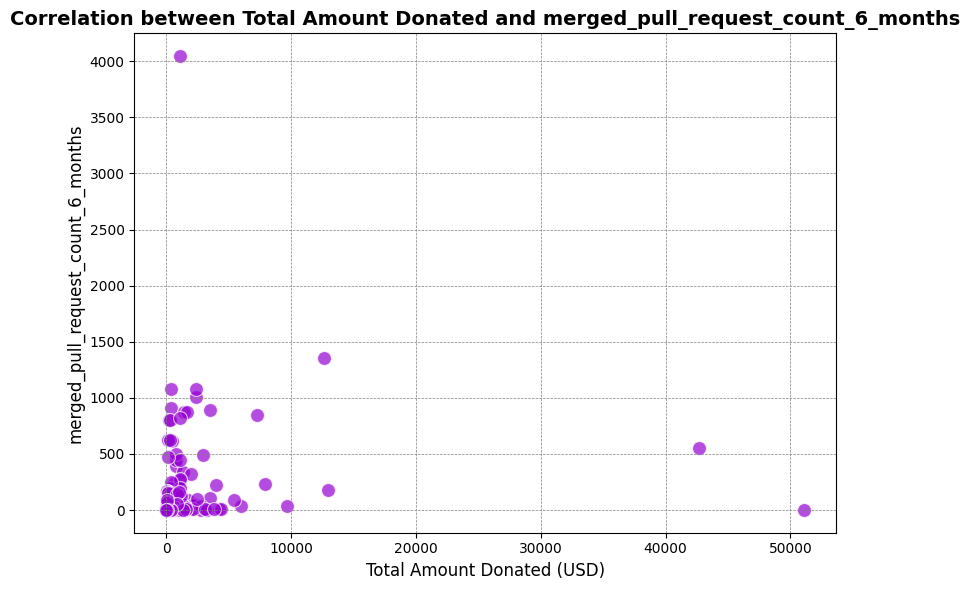

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a futuristic color palette (you can customize these colors)
colors = ["#007bff", "#9400d3"]

# Create scatter plots for each pair of variables
for i, column in enumerate(["star_count", "contributor_count", "fork_count", "new_contributor_count_6_months",
               "commit_count_6_months", "merged_pull_request_count_6_months"]):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x="total_amount_donated_in_usd", y=column,
                    color=colors[i % len(colors)], s=100, alpha=0.7)  # Use colors cyclically, adjust size and transparency

    plt.title(f"Correlation between Total Amount Donated and {column}", fontsize=14, fontweight='bold')
    plt.xlabel("Total Amount Donated (USD)", fontsize=12)
    plt.ylabel(column, fontsize=12)

    # Add grid lines for a futuristic look
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

    # Customize the background color (optional)
    # plt.gca().set_facecolor('#f0f0f0')

    plt.tight_layout()
    plt.show()

<ipython-input-35-88bd80584a9c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=round_metrics, x='round_name', y='total_donations', ax=axes[0], palette=colors)
<ipython-input-35-88bd80584a9c>:22: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=round_metrics, x='round_name', y='total_donations', ax=axes[0], palette=colors)
<ipython-input-35-88bd80584a9c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=round_metrics, x='round_name', y='unique_donors', ax=axes[1], palette=colors)
<ipython-input-35-88bd80584a9c>:29: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.b

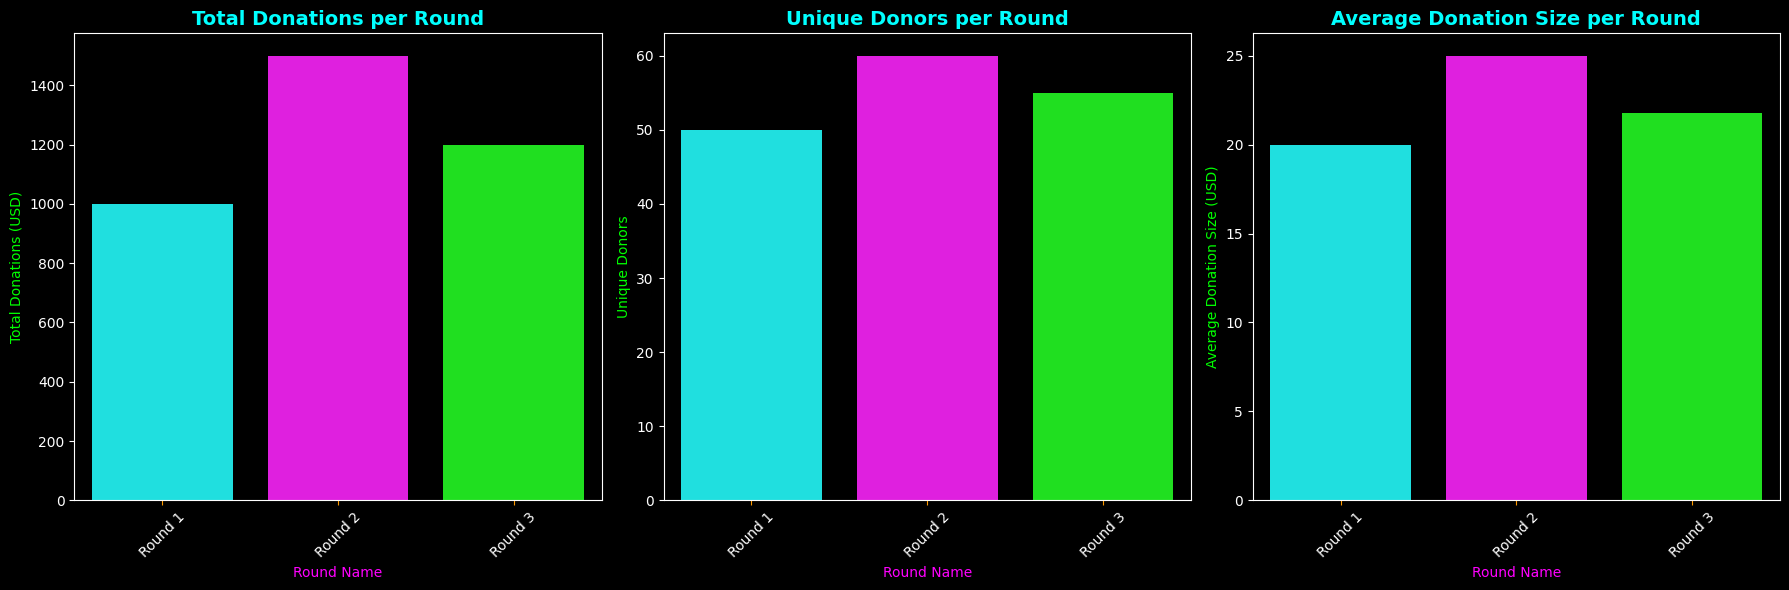

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


round_metrics = pd.DataFrame({ # Replace this with your actual calculation
    'round_name': ['Round 1', 'Round 2', 'Round 3'],
    'total_donations': [1000, 1500, 1200],
    'unique_donors': [50, 60, 55],
    'avg_donation_size': [20, 25, 21.8]
})

# Cyberpunk color palette
colors = ["#00FFFF", "#FF00FF", "#00FF00", "#FF9900"]

# Dark background
plt.style.use('dark_background')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Total Donations
sns.barplot(data=round_metrics, x='round_name', y='total_donations', ax=axes[0], palette=colors)
axes[0].set_title('Total Donations per Round', color=colors[0], fontsize=14, fontweight='bold')
axes[0].set_xlabel('Round Name', color=colors[1])
axes[0].set_ylabel('Total Donations (USD)', color=colors[2])
axes[0].tick_params(axis='x', rotation=45, color=colors[3]) # Remove 'ha' parameter

# Plot 2: Unique Donors
sns.barplot(data=round_metrics, x='round_name', y='unique_donors', ax=axes[1], palette=colors)
axes[1].set_title('Unique Donors per Round', color=colors[0], fontsize=14, fontweight='bold')
axes[1].set_xlabel('Round Name', color=colors[1])
axes[1].set_ylabel('Unique Donors', color=colors[2])
axes[1].tick_params(axis='x', rotation=45, color=colors[3]) # Remove 'ha' parameter

# Plot 3: Average Donation Size
sns.barplot(data=round_metrics, x='round_name', y='avg_donation_size', ax=axes[2], palette=colors)
axes[2].set_title('Average Donation Size per Round', color=colors[0], fontsize=14, fontweight='bold')
axes[2].set_xlabel('Round Name', color=colors[1])
axes[2].set_ylabel('Average Donation Size (USD)', color=colors[2])
axes[2].tick_params(axis='x', rotation=45, color=colors[3]) # Remove 'ha' parameter

plt.tight_layout()
plt.show()

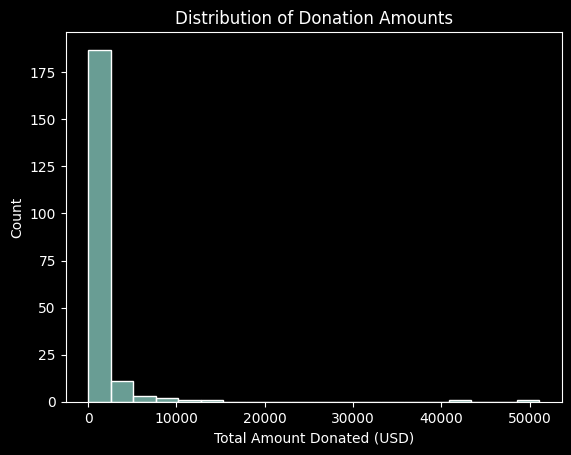

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Load your dataset) ...

plt.figure()
sns.histplot(df['total_amount_donated_in_usd'], bins=20)
plt.title("Distribution of Donation Amounts")
plt.xlabel("Total Amount Donated (USD)")
plt.show()

<ipython-input-37-f8f1b307ca1e>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  donations_over_time = df.groupby(df['first_commit_date'].dt.to_period('M'))['total_amount_donated_in_usd'].sum()


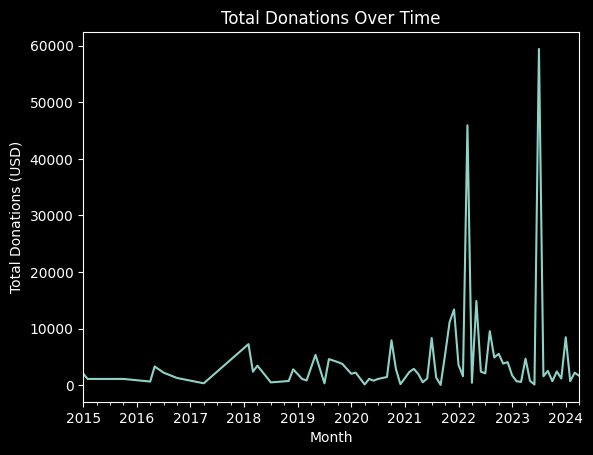

In [37]:
df['first_commit_date'] = pd.to_datetime(df['first_commit_date'])
donations_over_time = df.groupby(df['first_commit_date'].dt.to_period('M'))['total_amount_donated_in_usd'].sum()

plt.figure()
donations_over_time.plot(kind='line')
plt.title("Total Donations Over Time")
plt.xlabel("Month")
plt.ylabel("Total Donations (USD)")
plt.show()

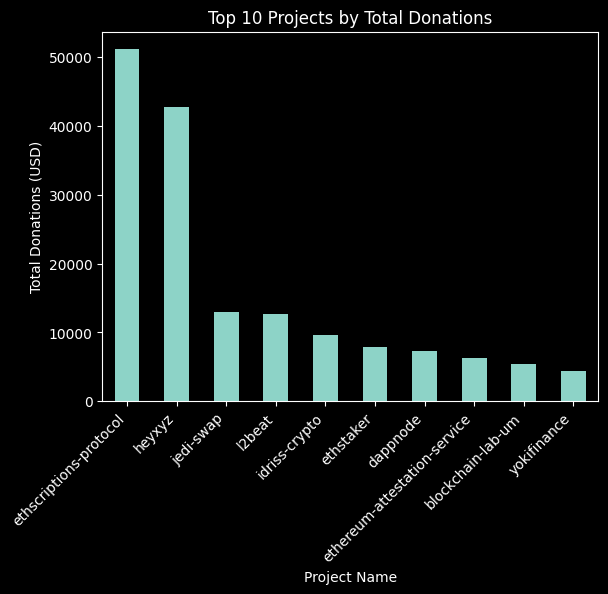

In [38]:
top_projects = df.groupby('project_name_y')['total_amount_donated_in_usd'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_projects.plot(kind='bar')
plt.title("Top 10 Projects by Total Donations")
plt.xlabel("Project Name")
plt.ylabel("Total Donations (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

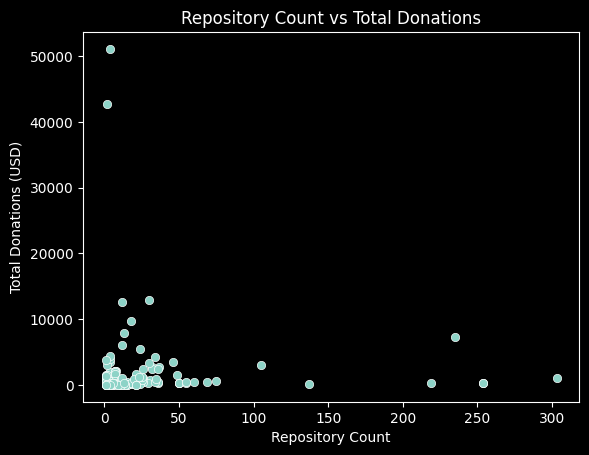

In [39]:
plt.figure()
sns.scatterplot(x='repository_count', y='total_amount_donated_in_usd', data=df)
plt.title("Repository Count vs Total Donations")
plt.xlabel("Repository Count")
plt.ylabel("Total Donations (USD)")
plt.show()